# How to Read IMERG Data Using Python

### Overview:
This recipe shows how to read data from the Global Precipitation Measurement (GPM) mission's IMERG dataset using Python.

### Example:
***Example data:*** _GPM Level 3 IMERG Monthly 0.1 x 0.1 degree Precipitation (GPM\_3IMERGM) for January 2014._

**Estimated Time to complete the following procedures:** 20 minutes

### Prerequisites

This notebook was written using Python 3.10, and requires:
- Valid [Earthdata Login credentials](https://urs.earthdata.nasa.gov), and the generation of [Earthdata Prerequisite Files](https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20Generate%20Earthdata%20Prerequisite%20Files) including the <code>.netrc</code> and `.dodsrc` files.
- [Xarray](https://docs.xarray.dev/en/stable/)
- [earthaccess](https://earthaccess.readthedocs.io/en/latest/)
- [NumPy (v1.26)](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Cartopy](https://scitools.org.uk/cartopy/docs/latest/)

#### Optional Anaconda Environment YAML:

This notebook can be run using the ['nasa-gesdisc' YAML file](https://github.com/nasa/gesdisc-tutorials/tree/main/environments/nasa-gesdisc.yml) provided in the 'environments' subfolder.

Please follow the instructions [here](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file) to install and activate this environment.

<img src ="https://disc.gsfc.nasa.gov/api/images/GPM_3IMERGM_figure1/file" title="Image1" width=650 height=500 />

**Figure 1:** Example GES DISC search results for GPM_3IMERGM.

### 1. Import Libraries

In [7]:
import earthaccess
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm
%matplotlib inline

### 2. Search and Download Granule using `earthaccess`

In this cell, the `earthaccess` library is used to authenticate with your Earthdata Login account, before searching and downloading the desired granule to the current working directory, unless otherwise specified.

In [8]:
# Authenticate with Earthdata Login servers
auth = earthaccess.login()

# Search for granules
results = earthaccess.search_data(
    short_name="GPM_3IMERGM",
    version="07",
    temporal=('2014-01-01', '2014-01-01'),
    bounding_box=(-180, 0, 180, 90)
)

# Print search results
print(results)

# Download the granule to the current working directory
downloaded_files = earthaccess.download(
    results,
    local_path='.', # Change this string to download to a different path
)

[Collection: {'ShortName': 'GPM_3IMERGM', 'Version': '07'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 180.0, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2014-01-01T00:00:00.000Z', 'EndingDateTime': '2014-01-31T23:59:59.999Z'}}
Size(MB): 16.699621200561523
Data: ['https://data.gesdisc.earthdata.nasa.gov/data/GPM_L3/GPM_3IMERGM.07/2014/3B-MO.MS.MRG.3IMERG.20140101-S000000-E235959.01.V07B.HDF5']]


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Stream the dataset to a variable and display metadata

In [9]:
ds = xr.open_mfdataset(downloaded_files, group="Grid")
ds

<xarray.Dataset>
Dimensions:                         (time: 1, lon: 3600, lat: 1800, nv: 2,
                                     lonv: 2, latv: 2)
Coordinates:
  * time                            (time) object 2014-01-01 00:00:00
  * lon                             (lon) float32 -179.9 -179.9 ... 179.8 179.9
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
Dimensions without coordinates: nv, lonv, latv
Data variables:
    time_bnds                       (time, nv) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds                        (lon, lonv) float32 dask.array<chunksize=(3600, 2), meta=np.ndarray>
    lat_bnds                        (lat, latv) float32 dask.array<chunksize=(1800, 2), meta=np.ndarray>
    precipitation                   (time, lon, lat) float32 dask.array<chunksize=(1, 145, 1800), meta=np.ndarray>
    randomError                     (time, lon, lat) float32 dask.array<chunksize=(1, 145, 1800), meta=np.ndarray>
    gaugeRelativeWeighting          (time, lon, lat) float32 dask.array<chunksize=(1, 291, 1800), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 291, 1800), meta=np.ndarray>
    precipitationQualityIndex       (time, lon, lat) float32 dask.array<chunksize=(1, 145, 1800), meta=np.ndarray>
Attributes:
    GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatitudeRe...

### 3. Load Variables

In [10]:
# Get the precipitation, latitude, and longitude variables
precip = ds['precipitation'][0,:,:].values
precip = np.transpose(precip)
theLats = ds['lat'].values
theLons = ds['lon'].values
x, y = np.float32(np.meshgrid(theLons, theLats))

### 4. Plot the Data using `matplotlib` and `Cartopy`

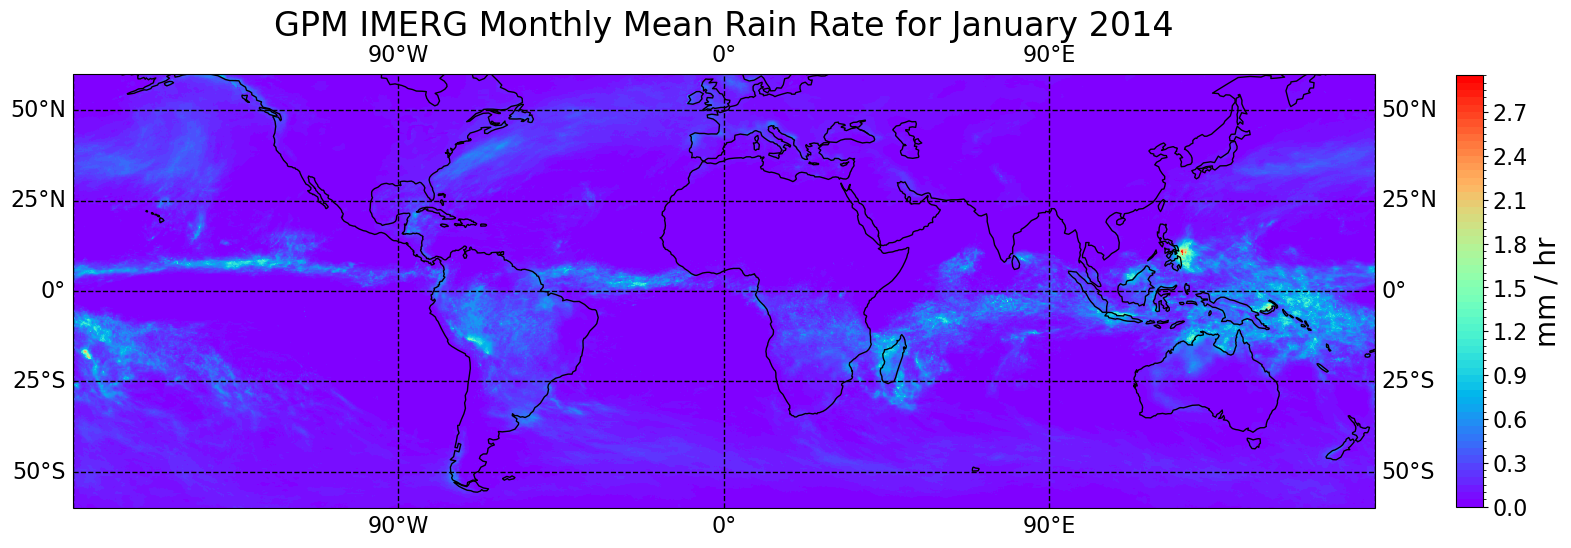

In [11]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(21, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, 60])  

# Add coastlines and formatted gridlines
ax.coastlines(resolution="110m", linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}

# Set contour levels
clevs = np.arange(0, 3, 0.05)

# Normalize the data to match clevs
norm = BoundaryNorm(clevs, ncolors=plt.cm.rainbow.N, clip=True)

# Plot the data with pcolormesh
mesh = plt.pcolormesh(x, y, precip, cmap=plt.cm.rainbow, norm=norm, shading="auto")

# Add a colorbar
cb = plt.colorbar(mesh, ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mm / hr', size=20)
cb.ax.tick_params(labelsize=16)

# Add a title
plt.title('GPM IMERG Monthly Mean Rain Rate for January 2014', size=24)

# Show the plot
plt.show()

Save the figure as a PNG:

In [12]:
fig.savefig('GPM_3IMERG_plot.png', bbox_inches='tight', pad_inches = 0.1)

<font size="1">THE SUBJECT FILE IS PROVIDED "AS IS" WITHOUT ANY WARRANTY OF ANY KIND, EITHER EXPRESSED, IMPLIED, OR STATUTORY, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTY THAT THE SUBJECT FILE WILL CONFORM TO SPECIFICATIONS, ANY IMPLIED WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, OR FREEDOM FROM INFRINGEMENT, ANY WARRANTY THAT THE SUBJECT FILE WILL BE ERROR FREE, OR ANY WARRANTY THAT DOCUMENTATION, IF PROVIDED, WILL CONFORM TO THE SUBJECT FILE. THIS AGREEMENT DOES NOT, IN ANY MANNER, CONSTITUTE AN ENDORSEMENT BY GOVERNMENT AGENCY OR ANY PRIOR RECIPIENT OF ANY RESULTS, RESULTING DESIGNS, HARDWARE, SOFTWARE PRODUCTS OR ANY OTHER APPLICATIONS RESULTING FROM USE OF THE SUBJECT FILE. FURTHER, GOVERNMENT AGENCY DISCLAIMS ALL WARRANTIES AND LIABILITIES REGARDING THIRD-PARTY SOFTWARE, IF PRESENT IN THE SUBJECT FILE, AND DISTRIBUTES IT "AS IS."